<a href="https://colab.research.google.com/github/JPUG26/proyecto_Kaggle_Modelos_I/blob/main/02_preprocesado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02 - preprocesado


In [ ]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()

## Descargar datos directamente desde Kaggle

- Crear un archivo `kaggle.json` con su token de autenticación (en Kaggle, haga clic en el icono de usuario en la esquina superior derecha, en la configuración, en la API y cree un nuevo token).
- Subirlo a este espacio de trabajo del cuaderno.
- Ejecutar la siguiente celda.

In [ ]:
# Importar librería os (Operating System) de Python para modificar variables de entorno o gestionar archivos
import os

# Le indica a Kaggle dónde debe buscar el archivo de autenticación
os.environ['KAGGLE_CONFIG_DIR'] = '.'

# Comando de terminal linux para que solo el propietario pueda leer y escribir
!chmod 600 ./kaggle.json
!kaggle competitions download -c udea-ai-4-eng-20252-pruebas-saber-pro-colombia

udea-ai-4-eng-20252-pruebas-saber-pro-colombia.zip: Skipping, found more recently modified local copy (use --force to force download)


## Descomprimir e inspeccionar datos

In [ ]:
!unzip udea*.zip > /dev/null

In [ ]:
!wc *.csv

   296787    296787   4716673 submission_example.csv
   296787   4565553  59185238 test.csv
   692501  10666231 143732437 train.csv
  1286075  15528571 207634348 total


## Cargar datos de `train.csv` con pandas



In [ ]:
import pandas as pd
import numpy as np

z = pd.read_csv("train.csv")
print ("shape of loaded dataframe", z.shape)


shape of loaded dataframe (692500, 21)


In [ ]:
z.head()

,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,...,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


## Preprocesado de datos

- La columna `RENDIMIENTO_GLOBAL` se generará utilizando el resto de las columnas.

  - `E_VALORMATRICULAUNIVERSIDAD`, que necesitaremos convertir a una **codificación continua**
  - `E_HORASSEMANATRABAJA`, que necesitaremos convertir a una **codificación continua**
  - `F_ESTRATOVIVIENDA`, que necesitaremos convertir a una **codificación onehot**
  - `F_TIENEINTERNET`, que necesitaremos convertir a una **codificación onehot**
  - `F_EDUCACIONPADRE`, que necesitaremos convertir a una **codificación onehot**
  - `F_TIENELAVADORA`, que necesitaremos convertir a una **codificación onehot**
  - `F_TIENEAUTOMOVIL`, que necesitaremos convertir a una **codificación onehot**
  - `E_PRIVADO_LIBERTAD`, que necesitaremos convertir a una **codificación onehot**
  - `E_PAGOMATRICULAPROPIO`, que necesitaremos convertir a una **codificación onehot**
  - `F_TIENECOMPUTADOR`, que necesitaremos convertir a una **codificación onehot**
  - `F_EDUCACIONMADRE`, que necesitaremos convertir a una **codificación onehot**



## Limpieza Inicial



Sustitución de los valores `nan` con un símbolo preestablecido para marcarlos

In [ ]:
# Sustitución de los valores `nan` con un símbolo preestablecido para marcarlos
z.E_VALORMATRICULAUNIVERSIDAD.values[z.E_VALORMATRICULAUNIVERSIDAD.isna()] = 'no info'
z.E_HORASSEMANATRABAJA.values[z.E_HORASSEMANATRABAJA.isna()] = 'no info'
z.F_ESTRATOVIVIENDA.values[z.F_ESTRATOVIVIENDA.isna()] = 'no info'
z.F_TIENEINTERNET.values[z.F_TIENEINTERNET.isna()] = 'no info'
z.F_EDUCACIONPADRE.values[z.F_EDUCACIONPADRE.isna()] = 'no info'
z.F_TIENELAVADORA.values[z.F_TIENELAVADORA.isna()] = 'no info'
z.F_TIENEAUTOMOVIL.values[z.F_TIENEAUTOMOVIL.isna()] = 'no info'
z.E_PRIVADO_LIBERTAD.values[z.E_PRIVADO_LIBERTAD.isna()] = 'no info'
z.E_PAGOMATRICULAPROPIO.values[z.E_PAGOMATRICULAPROPIO.isna()] = 'no info'
z.F_TIENECOMPUTADOR.values[z.F_TIENECOMPUTADOR.isna()] = 'no info'
#z.loc[z['F_TIENEINTERNET.1'].isna(), 'F_TIENEINTERNET.1'] = 'no info'
z.F_EDUCACIONMADRE.values[z.F_EDUCACIONMADRE.isna()] = 'no info'

# Verificación de que ya no hay ningún valor NaN
sum(z.E_VALORMATRICULAUNIVERSIDAD.isna()), sum(z.E_HORASSEMANATRABAJA.isna()), sum(z.F_ESTRATOVIVIENDA.isna()), sum(z.F_TIENEINTERNET.isna()), sum(z.F_EDUCACIONPADRE.isna()), sum(z.F_TIENELAVADORA.isna()), sum(z.F_TIENEAUTOMOVIL.isna()), sum(z.E_PRIVADO_LIBERTAD.isna()), sum(z.E_PAGOMATRICULAPROPIO.isna()), sum(z.F_TIENECOMPUTADOR.isna()), sum(z.F_EDUCACIONMADRE.isna())

### Conversión a valor continuo de `E_VALORMATRICULAUNIVERSIDAD`

Conversión `E_VALORMATRICULAUNIVERSIDAD` a un valor **continuo**, ya que el orden tiene sentido y queremos que los modelos puedan capturarlo.

In [ ]:
# Diccionario de phyton que mapea las categorías de texto a un número flotante que represente el punto medio del rango
cmap = {
 'No pagó matrícula': 0,
 'Menos de 500 mil': .250,
 'Entre 500 mil y menos de 1 millón': .75,
 'Entre 1 millón y menos de 2.5 millones': 1.75,
 'Entre 2.5 millones y menos de 4 millones': 3.25,
 'Entre 4 millones y menos de 5.5 millones': 4.75,
 'Entre 5.5 millones y menos de 7 millones': 6.25,
 'Más de 7 millones': 7.75,
 'no info': -1}

# Reemplaza la columna original con el array de números numpy, que se creo luego de reemplazar cada texto por el número específico
z.E_VALORMATRICULAUNIVERSIDAD = np.r_[[cmap[i] for i in z.E_VALORMATRICULAUNIVERSIDAD]]

# Realizar conteo de cuantas veces aparece cada valor numérico
z.E_VALORMATRICULAUNIVERSIDAD.value_counts()

### Conversión a valor continuo de `E_HORASSEMANATRABAJA`

Conversión `E_HORASSEMANATRABAJA` a un valor **continuo**, ya que el orden tiene sentido y quiere que los modelos puedan capturarlo.

In [ ]:
# Diccionario de phyton que mapea las categorías de texto a un número flotante que represente el punto medio del rango
cmap = {
 '0': 0,
 'Menos de 10 horas': 5,
 'Entre 11 y 20 horas': 15.5,
 'Entre 21 y 30 horas': 21.5,
 'Más de 30 horas': 35,
 'no info': -1}

# Reemplaza la columna original con el array de números numpy, que se creo luego de reemplazar cada texto por el número específico
z.E_HORASSEMANATRABAJA = np.r_[[cmap[i] for i in z.E_HORASSEMANATRABAJA]]

# Realizar conteo de cuantas veces aparece cada valor numérico
z.E_HORASSEMANATRABAJA.value_counts()

,count
E_HORASSEMANATRABAJA,
35.0,249352
0.0,116550
15.5,115857
21.5,92693
5.0,87191
-1.0,30857


### Limpieza de `F_ESTRATOVIVIENDA`

Se unirá en un solo valor `no info` y `Sin Estrato` para que no haya tantas columnas en la codificación one-hot

In [ ]:
z = z.copy()
z.F_ESTRATOVIVIENDA = ['no info' if i in ['Sin Estrato'] else i for i in z.F_ESTRATOVIVIENDA.values]

### Crear el mapeo onehot de `F_ESTRATOVIVIENDA`

In [ ]:
x = z.F_ESTRATOVIVIENDA.values
F_ESTRATOVIVIENDA_vals = sorted(np.unique(x))
F_ESTRATOVIVIENDA_onehot_vals = {val: np.eye(len(F_ESTRATOVIVIENDA_vals))[i] for i,val in enumerate(F_ESTRATOVIVIENDA_vals)}
F_ESTRATOVIVIENDA_onehot_vals

{'Estrato 1': array([1., 0., 0., 0., 0., 0., 0.]),
 'Estrato 2': array([0., 1., 0., 0., 0., 0., 0.]),
 'Estrato 3': array([0., 0., 1., 0., 0., 0., 0.]),
 'Estrato 4': array([0., 0., 0., 1., 0., 0., 0.]),
 'Estrato 5': array([0., 0., 0., 0., 1., 0., 0.]),
 'Estrato 6': array([0., 0., 0., 0., 0., 1., 0.]),
 'no info': array([0., 0., 0., 0., 0., 0., 1.])}

In [ ]:
F_ESTRATOVIVIENDA_onehot_enc = np.r_[[F_ESTRATOVIVIENDA_onehot_vals[i] for i in z.F_ESTRATOVIVIENDA]]
F_ESTRATOVIVIENDA_onehot_enc

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
F_ESTRATOVIVIENDA_df = pd.DataFrame(F_ESTRATOVIVIENDA_onehot_enc, columns=[f"F_ESTRATOVIVIENDA__{v}" for v in F_ESTRATOVIVIENDA_onehot_vals])
F_ESTRATOVIVIENDA_df

,F_ESTRATOVIVIENDA__Estrato 1,F_ESTRATOVIVIENDA__Estrato 2,F_ESTRATOVIVIENDA__Estrato 3,F_ESTRATOVIVIENDA__Estrato 4,F_ESTRATOVIVIENDA__Estrato 5,F_ESTRATOVIVIENDA__Estrato 6,F_ESTRATOVIVIENDA__no info
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
692495,0.0,1.0,0.0,0.0,0.0,0.0,0.0
692496,0.0,0.0,1.0,0.0,0.0,0.0,0.0
692497,0.0,0.0,1.0,0.0,0.0,0.0,0.0
692498,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### Crear el mapeo onehot de `F_TIENEINTERNET`



In [ ]:
x = z.F_TIENEINTERNET.values
F_TIENEINTERNET_vals = sorted(np.unique(x))
F_TIENEINTERNET_onehot_vals = {val: np.eye(len(F_TIENEINTERNET_vals))[i] for i,val in enumerate(F_TIENEINTERNET_vals)}
F_TIENEINTERNET_onehot_vals

{'No': array([1., 0., 0.]),
 'Si': array([0., 1., 0.]),
 'no info': array([0., 0., 1.])}

In [ ]:
F_TIENEINTERNET_onehot_enc = np.r_[[F_TIENEINTERNET_onehot_vals[i] for i in z.F_TIENEINTERNET]]
F_TIENEINTERNET_onehot_enc

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [ ]:
F_TIENEINTERNET_df = pd.DataFrame(F_TIENEINTERNET_onehot_enc, columns=[f"F_TIENEINTERNET__{v}" for v in F_TIENEINTERNET_onehot_vals])
F_TIENEINTERNET_df

,F_TIENEINTERNET__No,F_TIENEINTERNET__Si,F_TIENEINTERNET__no info
0,0.0,1.0,0.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
692495,0.0,1.0,0.0
692496,0.0,1.0,0.0
692497,0.0,1.0,0.0
692498,1.0,0.0,0.0


### Limpieza de `F_EDUCACIONPADRE`

Se unirá en un solo valor `no info`, `no sabe` y `no aplica` para que no haya tantas columnas en la codificación one-hot

In [ ]:
z = z.copy()
z.F_EDUCACIONPADRE = ['no info' if i in ['No sabe', 'No Aplica'] else i for i in z.F_EDUCACIONPADRE.values]

### Crear el mapeo onehot de `F_EDUCACIONPADRE`

In [ ]:
x = z.F_EDUCACIONPADRE.values
F_EDUCACIONPADRE_vals = sorted(np.unique(x))
F_EDUCACIONPADRE_onehot_vals = {val: np.eye(len(F_EDUCACIONPADRE_vals))[i] for i,val in enumerate(F_EDUCACIONPADRE_vals)}
F_EDUCACIONPADRE_onehot_vals

{'Educación profesional completa': array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'Educación profesional incompleta': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'Ninguno': array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'Postgrado': array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
 'Primaria completa': array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
 'Primaria incompleta': array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]),
 'Secundaria (Bachillerato) completa': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 'Secundaria (Bachillerato) incompleta': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]),
 'Técnica o tecnológica completa': array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]),
 'Técnica o tecnológica incompleta': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]),
 'no info': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])}

In [ ]:
F_EDUCACIONPADRE_onehot_enc = np.r_[[F_EDUCACIONPADRE_onehot_vals[i] for i in z.F_EDUCACIONPADRE]]
F_EDUCACIONPADRE_onehot_enc

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
F_EDUCACIONPADRE_df = pd.DataFrame(F_EDUCACIONPADRE_onehot_enc, columns=[f"F_EDUCACIONPADRE__{v}" for v in F_EDUCACIONPADRE_onehot_vals])
F_EDUCACIONPADRE_df

,F_EDUCACIONPADRE__Educación profesional completa,F_EDUCACIONPADRE__Educación profesional incompleta,F_EDUCACIONPADRE__Ninguno,F_EDUCACIONPADRE__Postgrado,F_EDUCACIONPADRE__Primaria completa,F_EDUCACIONPADRE__Primaria incompleta,F_EDUCACIONPADRE__Secundaria (Bachillerato) completa,F_EDUCACIONPADRE__Secundaria (Bachillerato) incompleta,F_EDUCACIONPADRE__Técnica o tecnológica completa,F_EDUCACIONPADRE__Técnica o tecnológica incompleta,F_EDUCACIONPADRE__no info
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
692495,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
692496,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
692497,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
692498,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### Crear el mapeo onehot de `F_TIENELAVADORA`

In [ ]:
x = z.F_TIENELAVADORA.values
F_TIENELAVADORA_vals = sorted(np.unique(x))
F_TIENELAVADORA_onehot_vals = {val: np.eye(len(F_TIENELAVADORA_vals))[i] for i,val in enumerate(F_TIENELAVADORA_vals)}
F_TIENELAVADORA_onehot_vals

{'No': array([1., 0., 0.]),
 'Si': array([0., 1., 0.]),
 'no info': array([0., 0., 1.])}

In [ ]:
F_TIENELAVADORA_onehot_enc = np.r_[[F_TIENELAVADORA_onehot_vals[i] for i in z.F_TIENELAVADORA]]
F_TIENELAVADORA_onehot_enc


array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [ ]:
F_TIENELAVADORA_df = pd.DataFrame(F_TIENELAVADORA_onehot_enc, columns=[f"F_TIENELAVADORA__{v}" for v in F_TIENELAVADORA_onehot_vals])
F_TIENELAVADORA_df

,F_TIENELAVADORA__No,F_TIENELAVADORA__Si,F_TIENELAVADORA__no info
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
692495,0.0,1.0,0.0
692496,0.0,1.0,0.0
692497,0.0,1.0,0.0
692498,1.0,0.0,0.0


### Crear el mapeo onehot de `F_TIENEAUTOMOVIL`

In [ ]:
x = z.F_TIENEAUTOMOVIL.values
F_TIENEAUTOMOVIL_vals = sorted(np.unique(x))
F_TIENEAUTOMOVIL_onehot_vals = {val: np.eye(len(F_TIENEAUTOMOVIL_vals))[i] for i,val in enumerate(F_TIENEAUTOMOVIL_vals)}
F_TIENEAUTOMOVIL_onehot_vals

{'No': array([1., 0., 0.]),
 'Si': array([0., 1., 0.]),
 'no info': array([0., 0., 1.])}

In [ ]:
F_TIENEAUTOMOVIL_onehot_enc = np.r_[[F_TIENEAUTOMOVIL_onehot_vals[i] for i in z.F_TIENEAUTOMOVIL]]
F_TIENEAUTOMOVIL_onehot_enc

array([[0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [ ]:
F_TIENEAUTOMOVIL_df = pd.DataFrame(F_TIENEAUTOMOVIL_onehot_enc, columns=[f"F_TIENEAUTOMOVIL__{v}" for v in F_TIENEAUTOMOVIL_onehot_vals])
F_TIENEAUTOMOVIL_df

,F_TIENEAUTOMOVIL__No,F_TIENEAUTOMOVIL__Si,F_TIENEAUTOMOVIL__no info
0,0.0,1.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,1.0,0.0
...,...,...,...
692495,1.0,0.0,0.0
692496,1.0,0.0,0.0
692497,1.0,0.0,0.0
692498,1.0,0.0,0.0


### Crear el mapeo onehot de `E_PRIVADO_LIBERTAD`

In [ ]:
x = z.E_PRIVADO_LIBERTAD.values
E_PRIVADO_LIBERTAD_vals = sorted(np.unique(x))
E_PRIVADO_LIBERTAD_onehot_vals = {val: np.eye(len(E_PRIVADO_LIBERTAD_vals))[i] for i,val in enumerate(E_PRIVADO_LIBERTAD_vals)}
E_PRIVADO_LIBERTAD_onehot_vals

{'N': array([1., 0.]), 'S': array([0., 1.])}

In [ ]:
E_PRIVADO_LIBERTAD_onehot_enc = np.r_[[E_PRIVADO_LIBERTAD_onehot_vals[i] for i in z.E_PRIVADO_LIBERTAD]]
E_PRIVADO_LIBERTAD_onehot_enc

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [ ]:
E_PRIVADO_LIBERTAD_df = pd.DataFrame(E_PRIVADO_LIBERTAD_onehot_enc, columns=[f"E_PRIVADO_LIBERTAD__{v}" for v in E_PRIVADO_LIBERTAD_onehot_vals])
E_PRIVADO_LIBERTAD_df

,E_PRIVADO_LIBERTAD__N,E_PRIVADO_LIBERTAD__S
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
692495,1.0,0.0
692496,1.0,0.0
692497,1.0,0.0
692498,1.0,0.0


### Crear el mapeo onehot de `E_PAGOMATRICULAPROPIO`

In [ ]:
x = z.E_PAGOMATRICULAPROPIO.values
E_PAGOMATRICULAPROPIO_vals = sorted(np.unique(x))
E_PAGOMATRICULAPROPIO_onehot_vals = {val: np.eye(len(E_PAGOMATRICULAPROPIO_vals))[i] for i,val in enumerate(E_PAGOMATRICULAPROPIO_vals)}
E_PAGOMATRICULAPROPIO_onehot_vals

{'No': array([1., 0., 0.]),
 'Si': array([0., 1., 0.]),
 'no info': array([0., 0., 1.])}

In [ ]:
E_PAGOMATRICULAPROPIO_onehot_enc = np.r_[[E_PAGOMATRICULAPROPIO_onehot_vals[i] for i in z.E_PAGOMATRICULAPROPIO]]
E_PAGOMATRICULAPROPIO_onehot_enc

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [ ]:
E_PAGOMATRICULAPROPIO_df = pd.DataFrame(E_PAGOMATRICULAPROPIO_onehot_enc, columns=[f"E_PAGOMATRICULAPROPIO__{v}" for v in E_PAGOMATRICULAPROPIO_onehot_vals])
E_PAGOMATRICULAPROPIO_df

,E_PAGOMATRICULAPROPIO__No,E_PAGOMATRICULAPROPIO__Si,E_PAGOMATRICULAPROPIO__no info
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
692495,0.0,1.0,0.0
692496,1.0,0.0,0.0
692497,0.0,1.0,0.0
692498,0.0,1.0,0.0


### Crear el mapeo onehot de `F_TIENECOMPUTADOR`

In [ ]:
x = z.F_TIENECOMPUTADOR.values
F_TIENECOMPUTADOR_vals = sorted(np.unique(x))
F_TIENECOMPUTADOR_onehot_vals = {val: np.eye(len(F_TIENECOMPUTADOR_vals))[i] for i,val in enumerate(F_TIENECOMPUTADOR_vals)}
F_TIENECOMPUTADOR_onehot_vals

{'No': array([1., 0., 0.]),
 'Si': array([0., 1., 0.]),
 'no info': array([0., 0., 1.])}

In [ ]:
F_TIENECOMPUTADOR_onehot_enc = np.r_[[F_TIENECOMPUTADOR_onehot_vals[i] for i in z.F_TIENECOMPUTADOR]]
F_TIENECOMPUTADOR_onehot_enc

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [ ]:
F_TIENECOMPUTADOR_df = pd.DataFrame(F_TIENECOMPUTADOR_onehot_enc, columns=[f"F_TIENECOMPUTADOR__{v}" for v in F_TIENECOMPUTADOR_onehot_vals])
F_TIENECOMPUTADOR_df

,F_TIENECOMPUTADOR__No,F_TIENECOMPUTADOR__Si,F_TIENECOMPUTADOR__no info
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
692495,0.0,1.0,0.0
692496,0.0,1.0,0.0
692497,0.0,1.0,0.0
692498,0.0,1.0,0.0


### Limpieza de `F_EDUCACIONMADRE`

Se unirá en un solo valor `no info`, `no sabe` y `no aplica` para que no haya tantas columnas en la codificación one-hot

In [ ]:
z = z.copy()
z.F_EDUCACIONMADRE = ['no info' if i in ['No sabe', 'No Aplica'] else i for i in z.F_EDUCACIONMADRE.values]

### Crear el mapeo onehot de `F_EDUCACIONMADRE`

In [ ]:
x = z.F_EDUCACIONMADRE.values
F_EDUCACIONMADRE_vals = sorted(np.unique(x))
F_EDUCACIONMADRE_onehot_vals = {val: np.eye(len(F_EDUCACIONMADRE_vals))[i] for i,val in enumerate(F_EDUCACIONMADRE_vals)}
F_EDUCACIONMADRE_onehot_vals

{'Educación profesional completa': array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'Educación profesional incompleta': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'Ninguno': array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'Postgrado': array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
 'Primaria completa': array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
 'Primaria incompleta': array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]),
 'Secundaria (Bachillerato) completa': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 'Secundaria (Bachillerato) incompleta': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]),
 'Técnica o tecnológica completa': array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]),
 'Técnica o tecnológica incompleta': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]),
 'no info': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])}

In [ ]:
F_EDUCACIONMADRE_onehot_enc = np.r_[[F_EDUCACIONMADRE_onehot_vals[i] for i in z.F_EDUCACIONMADRE]]
F_EDUCACIONMADRE_onehot_enc

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [ ]:
F_EDUCACIONMADRE_df = pd.DataFrame(F_EDUCACIONMADRE_onehot_enc, columns=[f"F_EDUCACIONMADRE__{v}" for v in F_EDUCACIONMADRE_onehot_vals])
F_EDUCACIONMADRE_df

,F_EDUCACIONMADRE__Educación profesional completa,F_EDUCACIONMADRE__Educación profesional incompleta,F_EDUCACIONMADRE__Ninguno,F_EDUCACIONMADRE__Postgrado,F_EDUCACIONMADRE__Primaria completa,F_EDUCACIONMADRE__Primaria incompleta,F_EDUCACIONMADRE__Secundaria (Bachillerato) completa,F_EDUCACIONMADRE__Secundaria (Bachillerato) incompleta,F_EDUCACIONMADRE__Técnica o tecnológica completa,F_EDUCACIONMADRE__Técnica o tecnológica incompleta,F_EDUCACIONMADRE__no info
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
692495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
692496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
692497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
692498,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### Eliminación de dataframes originales y concatenación de los nuevos DataFrames 'One-hot'

Se junta todo en un solo dataframe, eliminando las columnas originales que se limpiaron y que se convirtieron en DataFrames 'One-hot'.

se tienen 37 columnas binarias a las que se le asigna un valor de 1 a solo una de ellas por cada fila, de acuerdo al valor asociado a cada uno de los estudiantes con el DataFrame original y sus correspondientes columnas.

In [ ]:
# Lista de todas las columnas originales que se van a eliminar
columnas_originales = ['ID', 'PERIODO_ACADEMICO', 'E_PRGM_ACADEMICO','E_PRGM_DEPARTAMENTO','F_ESTRATOVIVIENDA', 'F_TIENEINTERNET','F_EDUCACIONPADRE','F_TIENELAVADORA','F_TIENEAUTOMOVIL',
                       'E_PRIVADO_LIBERTAD','E_PAGOMATRICULAPROPIO','F_TIENECOMPUTADOR','F_TIENEINTERNET.1','F_EDUCACIONMADRE', 'INDICADOR_1', 'INDICADOR_2', 'INDICADOR_3', 'INDICADOR_4']

# Lista de TODOS los DataFrames que se van a unir
#    ('z' + todos los nuevos DataFrames 'one-hot')
dataframes_para_unir = [
    z,
    F_TIENEINTERNET_df, F_EDUCACIONPADRE_df, F_TIENELAVADORA_df, F_TIENEAUTOMOVIL_df,
     E_PAGOMATRICULAPROPIO_df, F_TIENECOMPUTADOR_df, F_EDUCACIONMADRE_df
    ]

# Concatena todo: z + todos los nuevos DataFrames
z_final = pd.concat(dataframes_para_unir, axis=1)

# Elimina todas las columnas originales
z_final = z_final.drop(columns=columnas_originales)

# Revisar el resultado de la concatenación
print(z_final.shape)
z_final

(692500, 40)


,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,RENDIMIENTO_GLOBAL,F_TIENEINTERNET__No,F_TIENEINTERNET__Si,F_TIENEINTERNET__no info,F_EDUCACIONPADRE__Educación profesional completa,F_EDUCACIONPADRE__Educación profesional incompleta,F_EDUCACIONPADRE__Ninguno,F_EDUCACIONPADRE__Postgrado,...,F_EDUCACIONMADRE__Educación profesional incompleta,F_EDUCACIONMADRE__Ninguno,F_EDUCACIONMADRE__Postgrado,F_EDUCACIONMADRE__Primaria completa,F_EDUCACIONMADRE__Primaria incompleta,F_EDUCACIONMADRE__Secundaria (Bachillerato) completa,F_EDUCACIONMADRE__Secundaria (Bachillerato) incompleta,F_EDUCACIONMADRE__Técnica o tecnológica completa,F_EDUCACIONMADRE__Técnica o tecnológica incompleta,F_EDUCACIONMADRE__no info
0,6.25,5.0,medio-alto,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.25,0.0,bajo,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3.25,35.0,bajo,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,4.75,0.0,alto,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,3.25,21.5,medio-bajo,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,0.75,15.5,medio-alto,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
692496,3.25,35.0,bajo,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
692497,1.75,5.0,medio-bajo,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
692498,3.25,5.0,bajo,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


## Convertir la columna objetivo (predicción) en valores discretos.

Ahora los conjuntos de datos son **numéricos**!!!

In [ ]:
y_col = 'RENDIMIENTO_GLOBAL'

rmap = {'alto': 3, 'bajo':0, 'medio-bajo':1, 'medio-alto':2}
z_final[y_col] = [rmap[i] for i in z_final[y_col]]
z_final.head()

,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,RENDIMIENTO_GLOBAL,F_TIENEINTERNET__No,F_TIENEINTERNET__Si,F_TIENEINTERNET__no info,F_EDUCACIONPADRE__Educación profesional completa,F_EDUCACIONPADRE__Educación profesional incompleta,F_EDUCACIONPADRE__Ninguno,F_EDUCACIONPADRE__Postgrado,...,F_EDUCACIONMADRE__Educación profesional incompleta,F_EDUCACIONMADRE__Ninguno,F_EDUCACIONMADRE__Postgrado,F_EDUCACIONMADRE__Primaria completa,F_EDUCACIONMADRE__Primaria incompleta,F_EDUCACIONMADRE__Secundaria (Bachillerato) completa,F_EDUCACIONMADRE__Secundaria (Bachillerato) incompleta,F_EDUCACIONMADRE__Técnica o tecnológica completa,F_EDUCACIONMADRE__Técnica o tecnológica incompleta,F_EDUCACIONMADRE__no info
0,6.25,5.0,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.25,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3.25,35.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,4.75,0.0,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,3.25,21.5,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


## Se construye `X` e `y` para entrenar un modelo

Se ordenan las columnas para asegurarnos de que siempre tengan el mismo orden.

In [ ]:
# Reordena alfabéticamente las columnas del DataFrame Z_final
z_final = z_final[sorted(z_final.columns)]

# Crea array NumPy de características X, crea una lista de todas las columnas menos la variable objetivo 'RENDIMIENTO_GLOBAL'
X = z_final[[c for c in z_final.columns if c!=y_col]].values

# Selecciona la columna objetivo y la convierte en un array Numpy
y = z_final[y_col].values

# Verificar las dimensiones de los arrays NumPy
X.shape, y.shape

((692500, 39), (692500,))

## Dividir en conjunto de entrenamiento y probar

In [ ]:
# Importar la herramienta train_test_split de la librería Scikit-learn para dividir datos
from sklearn.model_selection import train_test_split

In [ ]:
# Para asignar el 80% de los datos al conjunto de entrenamiento y el 20% restante se usará para calificar al modelo
Xtr, Xts, ytr, yts = train_test_split(X,y, train_size=0.8)

# Imprime las dimensiones de los cuatro nuevos conjuntos de datos
Xtr.shape, Xts.shape, ytr.shape, yts.shape

((554000, 39), (138500, 39), (554000,), (138500,))

## Crear un modelo lineal para la clasificación.

Entrenar modelo

In [ ]:
#from sklearn.linear_model import LogisticRegression

#lr = LogisticRegression(max_iter=1000)
#lr.fit(Xtr, ytr)

## Crear un modelo con ramdom forest

In [ ]:
# Importar RandomForestClassifier desde la librería sklearn
#from sklearn.ensemble import RandomForestClassifier

# Crea el modelo con 800 árboles de decisión
# random_state=42 permite que el resultado sea reproducible
# n_jobs=-1 usa todos los núcleos disponibles
#rf = RandomForestClassifier(n_estimators=800, random_state=42, n_jobs=-1)

# Se entrena al modelo
#rf.fit(Xtr, ytr)

# Se puede ver qué variables consideró más importantes
#print(rf.feature_importances_)

In [ ]:
# 1. Instala LightGBM (usualmente ya viene en Colab, pero por si acaso)
#!pip install lightgbm

#from lightgbm import LGBMClassifier

# 2. Crea el modelo (es un reemplazo directo de RandomForest)
#    Los parámetros son similares:
#    n_estimators=800 (sigue siendo el número de árboles)
#    n_jobs=-1 (también usa todos los núcleos)
#    random_state=42 (para reproducibilidad)
#print("Entrenando modelo LightGBM...")
#lgbm = LGBMClassifier(n_estimators=1000, random_state=42, n_jobs=-1)

# 3. Entrena (esto será MUCHO más rápido)
#lgbm.fit(Xtr, ytr)

#print("¡Modelo LGBM entrenado!")

In [ ]:
import lightgbm as lgbm # Necesitas importar 'lightgbm' para el callback

lgbm_early = LGBMClassifier(
    n_estimators=1000,      # Un número máximo alto
    learning_rate=0.05,     # Aprende más despacio
    num_leaves=25,          # Se puede reducir
    random_state=42,
    n_jobs=-1
)

print("Entrenando con Early Stopping...")
# Xts, yts como 'eval_set' para medir el error
lgbm_early.fit(
    Xtr, ytr,
    eval_set=[(Xts, yts)],               # Set de validación
    eval_metric='multi_logloss',         # Métrica para monitorear
    callbacks=[lgbm.early_stopping(100)] # Se detiene si no mejora en 100 rondas
)

Entrenando con Early Stopping...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.053154 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 89
[LightGBM] [Info] Number of data points in the train set: 554000, number of used features: 39
[LightGBM] [Info] Start training from score -1.386720
[LightGBM] [Info] Start training from score -1.392000
[LightGBM] [Info] Start training from score -1.393992
[LightGBM] [Info] Start training from score -1.372605
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[295]	valid_0's multi_logloss: 1.26977


LGBMClassifier(learning_rate=0.05, n_estimators=1000, n_jobs=-1, num_leaves=25,
               random_state=42)

Obtener predicciones

In [ ]:
preds_tr = lgbm_early.predict(Xtr)
preds_ts = lgbm_early.predict(Xts)

/usr/local/lib/python3.12/dist-packages/lightgbm/sklearn.py:1108: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  X = _LGBMValidateData(
/usr/local/lib/python3.12/dist-packages/lightgbm/sklearn.py:1108: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  X = _LGBMValidateData(


In [ ]:
print (preds_tr[:10])
print (preds_ts[:10])

[1 2 0 0 1 0 2 3 3 2]
[3 3 3 1 3 0 1 0 0 0]


## Obtener matrices de confusión

In [ ]:
np.mean(preds_tr==ytr), np.mean(preds_ts==yts)

(np.float64(0.3965758122743682), np.float64(0.3912057761732852))

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm_tr = confusion_matrix(ytr, preds_tr)
cm_ts = confusion_matrix(yts, preds_ts)

# Normalizar por clase
cm_tr = cm_tr / cm_tr.sum(axis=1).reshape(-1,1)
cm_ts = cm_ts / cm_ts.sum(axis=1).reshape(-1,1)

Los valores de cada fila en la matriz de confusión suman 1 porque ha sido normalizada por fila y está mostrando proporciones en vez de conteos absolutos.

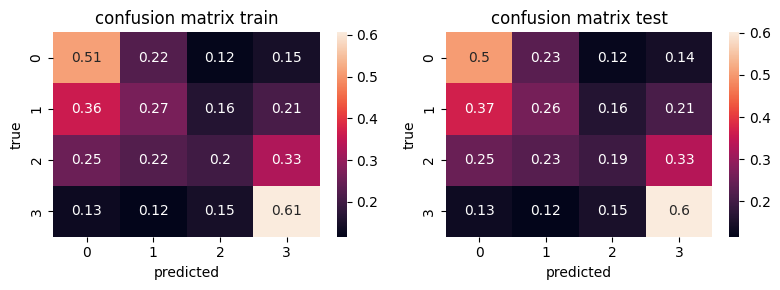

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from rlxutils import subplots

for ax,i in subplots(2, usizex=4):
  if i==0: sns.heatmap(cm_tr, annot=True); plt.title("confusion matrix train")
  if i==1: sns.heatmap(cm_ts, annot=True); plt.title("confusion matrix test")
  plt.ylabel("true")
  plt.xlabel("predicted")

## Determinar columnas irrelevantes

In [ ]:
# Obtener la lista de nombres de columnas
feature_names = z_final.drop(columns=[y_col]).columns

# Crear un DataFrame para ver las importancias
importancias_df = pd.DataFrame({
    'feature': feature_names,
    'importance': lgbm_early.feature_importances_
}).sort_values(by='importance', ascending=False)

# Imprimir en orden de importancia
print(importancias_df.tail(39))

                                              feature  importance
4                         E_VALORMATRICULAUNIVERSIDAD        5147
0                                E_HORASSEMANATRABAJA        4110
1                           E_PAGOMATRICULAPROPIO__No         906
28                               F_TIENEAUTOMOVIL__Si         806
33                                F_TIENEINTERNET__No         762
2                           E_PAGOMATRICULAPROPIO__Si         722
27                               F_TIENEAUTOMOVIL__No         705
37                                F_TIENELAVADORA__Si         696
8                         F_EDUCACIONMADRE__Postgrado         676
30                              F_TIENECOMPUTADOR__No         661
10              F_EDUCACIONMADRE__Primaria incompleta         647
31                              F_TIENECOMPUTADOR__Si         642
5    F_EDUCACIONMADRE__Educación profesional completa         626
16   F_EDUCACIONPADRE__Educación profesional completa         616
21        

## Se mantiene el primer modelo; ahora se aplica el mismo procedimiento a `test.csv`

Observación:
- No existe la columna `RENDIMIENTO_GLOBAL`
- Se debe conservar los ID para poder crear correctamente el archivo de envío

In [ ]:
zt = pd.read_csv("test.csv")
zt

,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
0,550236,20183,TRABAJO SOCIAL,BOLIVAR,Menos de 500 mil,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica completa,Si,No,N,Si,Si,Si,Primaria completa,0.328,0.219,0.317,0.247
1,98545,20203,ADMINISTRACION COMERCIAL Y DE MERCADEO,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,No,N,No,Si,Si,Técnica o tecnológica completa,0.227,0.283,0.296,0.324
2,499179,20212,INGENIERIA MECATRONICA,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,0,Estrato 3,Si,Secundaria (Bachillerato) incompleta,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,0.285,0.228,0.294,0.247
3,782980,20195,CONTADURIA PUBLICA,SUCRE,Entre 1 millón y menos de 2.5 millones,Entre 21 y 30 horas,Estrato 1,No,Primaria incompleta,Si,No,N,No,No,No,Primaria incompleta,0.160,0.408,0.217,0.294
4,785185,20212,ADMINISTRACION DE EMPRESAS,ATLANTICO,Entre 2.5 millones y menos de 4 millones,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,0.209,0.283,0.306,0.286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296781,496981,20195,ADMINISTRACION DE EMPRESAS,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 1,Si,Primaria incompleta,Si,Si,N,Si,Si,Si,Primaria incompleta,0.168,0.410,0.235,0.300
296782,209415,20183,DERECHO,META,Entre 1 millón y menos de 2.5 millones,0,Estrato 4,Si,Educación profesional completa,Si,No,N,No,Si,Si,Educación profesional completa,0.471,0.184,0.264,0.193
296783,239074,20212,DERECHO,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,No,Si,Si,Educación profesional completa,0.292,0.249,0.276,0.256
296784,963852,20195,INGENIERIA AERONAUTICA,ANTIOQUIA,Entre 5.5 millones y menos de 7 millones,Entre 11 y 20 horas,Estrato 3,Si,Educación profesional completa,Si,No,N,No,Si,Si,Educación profesional completa,0.305,0.219,0.310,0.260


In [ ]:
# Guardar los id de los estudiantes
zt_ids = zt['ID'].values

# Se sobreescribe el DataFrame zt unicamente con las 9 columnas especificadas
zt = zt[['E_VALORMATRICULAUNIVERSIDAD', 'E_HORASSEMANATRABAJA', 'F_TIENEINTERNET', 'F_EDUCACIONPADRE', 'F_TIENELAVADORA', 'F_TIENEAUTOMOVIL', 'E_PAGOMATRICULAPROPIO', 'F_TIENECOMPUTADOR', 'F_EDUCACIONMADRE']]

# Revisar dimensiones de zt
print ("Dimensiones del DataFrame cargado", zt.shape)

# Mostrar las primeras 5 filas del nuevo dataframe
zt.head()

Dimensiones del DataFrame cargado (296786, 9)


,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_EDUCACIONMADRE
0,Menos de 500 mil,Menos de 10 horas,Si,Técnica o tecnológica completa,Si,No,Si,Si,Primaria completa
1,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Si,Secundaria (Bachillerato) completa,Si,No,No,Si,Técnica o tecnológica completa
2,Entre 1 millón y menos de 2.5 millones,0,Si,Secundaria (Bachillerato) incompleta,Si,No,No,Si,Secundaria (Bachillerato) completa
3,Entre 1 millón y menos de 2.5 millones,Entre 21 y 30 horas,No,Primaria incompleta,Si,No,No,No,Primaria incompleta
4,Entre 2.5 millones y menos de 4 millones,Entre 11 y 20 horas,Si,Secundaria (Bachillerato) completa,Si,No,No,Si,Secundaria (Bachillerato) completa


In [ ]:
# Sustitución de los valores `nan` con un símbolo preestablecido para marcarlos
zt.E_VALORMATRICULAUNIVERSIDAD.values[zt.E_VALORMATRICULAUNIVERSIDAD.isna()] = 'no info'
zt.E_HORASSEMANATRABAJA.values[zt.E_HORASSEMANATRABAJA.isna()] = 'no info'
zt.F_TIENEINTERNET.values[zt.F_TIENEINTERNET.isna()] = 'no info'
zt.F_EDUCACIONPADRE.values[zt.F_EDUCACIONPADRE.isna()] = 'no info'
zt.F_TIENELAVADORA.values[zt.F_TIENELAVADORA.isna()] = 'no info'
zt.F_TIENEAUTOMOVIL.values[zt.F_TIENEAUTOMOVIL.isna()] = 'no info'
zt.E_PAGOMATRICULAPROPIO.values[zt.E_PAGOMATRICULAPROPIO.isna()] = 'no info'
zt.F_TIENECOMPUTADOR.values[zt.F_TIENECOMPUTADOR.isna()] = 'no info'
#zt.loc[z['F_TIENEINTERNET.1'].isna(), 'F_TIENEINTERNET.1'] = 'no info'
zt.F_EDUCACIONMADRE.values[zt.F_EDUCACIONMADRE.isna()] = 'no info'

In [ ]:
# Diccionario de phyton que mapea las categorías de texto a un número flotante que represente el punto medio del rango
cmap = {
 '0': 0,
 'Menos de 10 horas': 5,
 'Entre 11 y 20 horas': 15.5,
 'Entre 21 y 30 horas': 21.5,
 'Más de 30 horas': 35,
 'no info': -1}

# Reemplaza la columna original con el array de números numpy, que se creo luego de reemplazar cada texto por el número específico
zt.E_HORASSEMANATRABAJA = np.r_[[cmap[i] for i in zt.E_HORASSEMANATRABAJA]]

# Diccionario de phyton que mapea las categorías de texto a un número flotante que represente el punto medio del rango
cmap = {
 'No pagó matrícula': 0,
 'Menos de 500 mil': .250,
 'Entre 500 mil y menos de 1 millón': .75,
 'Entre 1 millón y menos de 2.5 millones': 1.75,
 'Entre 2.5 millones y menos de 4 millones': 3.25,
 'Entre 4 millones y menos de 5.5 millones': 4.75,
 'Entre 5.5 millones y menos de 7 millones': 6.25,
 'Más de 7 millones': 7.75,
 'no info': -1}

# Reemplaza la columna original con el array de números numpy, que se creo luego de reemplazar cada texto por el número específico
zt.E_VALORMATRICULAUNIVERSIDAD = np.r_[[cmap[i] for i in zt.E_VALORMATRICULAUNIVERSIDAD]]


/usr/local/lib/python3.12/dist-packages/IPython/core/interactiveshell.py:3473: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if (await self.run_code(code, result,  async_=asy)):


In [ ]:
zt

,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_EDUCACIONMADRE
0,0.25,5.0,Si,Técnica o tecnológica completa,Si,No,Si,Si,Primaria completa
1,3.25,21.5,Si,Secundaria (Bachillerato) completa,Si,No,No,Si,Técnica o tecnológica completa
2,1.75,0.0,Si,Secundaria (Bachillerato) incompleta,Si,No,No,Si,Secundaria (Bachillerato) completa
3,1.75,21.5,No,Primaria incompleta,Si,No,No,No,Primaria incompleta
4,3.25,15.5,Si,Secundaria (Bachillerato) completa,Si,No,No,Si,Secundaria (Bachillerato) completa
...,...,...,...,...,...,...,...,...,...
296781,3.25,35.0,Si,Primaria incompleta,Si,Si,Si,Si,Primaria incompleta
296782,1.75,0.0,Si,Educación profesional completa,Si,No,No,Si,Educación profesional completa
296783,3.25,35.0,Si,Secundaria (Bachillerato) completa,Si,No,No,Si,Educación profesional completa
296784,6.25,15.5,Si,Educación profesional completa,Si,No,No,Si,Educación profesional completa


In [ ]:
zt.F_EDUCACIONMADRE = ['no info' if i in ['No sabe', 'No Aplica'] else i for i in zt.F_EDUCACIONMADRE.values]

F_EDUCACIONMADRE_onehot_enc = np.r_[[F_EDUCACIONMADRE_onehot_vals[i] for i in zt.F_EDUCACIONMADRE]]
F_EDUCACIONMADRE_df = pd.DataFrame(F_EDUCACIONMADRE_onehot_enc, columns=[f"F_EDUCACIONMADRE__{v}" for v in F_EDUCACIONMADRE_onehot_vals])
zt = pd.concat([F_EDUCACIONMADRE_df, zt], axis=1).drop('F_EDUCACIONMADRE', axis=1)

zt.F_EDUCACIONPADRE = ['no info' if i in ['No sabe', 'No Aplica'] else i for i in zt.F_EDUCACIONPADRE.values]

F_EDUCACIONPADRE_onehot_enc = np.r_[[F_EDUCACIONPADRE_onehot_vals[i] for i in zt.F_EDUCACIONPADRE]]
F_EDUCACIONPADRE_df = pd.DataFrame(F_EDUCACIONPADRE_onehot_enc, columns=[f"F_EDUCACIONPADRE__{v}" for v in F_EDUCACIONPADRE_onehot_vals])
zt = pd.concat([F_EDUCACIONPADRE_df, zt], axis=1).drop('F_EDUCACIONPADRE', axis=1)

F_TIENEINTERNET_onehot_enc = np.r_[[F_TIENEINTERNET_onehot_vals[i] for i in zt.F_TIENEINTERNET]]
F_TIENEINTERNET_df = pd.DataFrame(F_TIENEINTERNET_onehot_enc, columns=[f"F_TIENEINTERNET__{v}" for v in F_TIENEINTERNET_onehot_vals])
zt = pd.concat([F_TIENEINTERNET_df, zt], axis=1).drop('F_TIENEINTERNET', axis=1)

F_TIENELAVADORA_onehot_enc = np.r_[[F_TIENELAVADORA_onehot_vals[i] for i in zt.F_TIENELAVADORA]]
F_TIENELAVADORA_df = pd.DataFrame(F_TIENELAVADORA_onehot_enc, columns=[f"F_TIENELAVADORA__{v}" for v in F_TIENELAVADORA_onehot_vals])
zt = pd.concat([F_TIENELAVADORA_df, zt], axis=1).drop('F_TIENELAVADORA', axis=1)

F_TIENEAUTOMOVIL_onehot_enc = np.r_[[F_TIENEAUTOMOVIL_onehot_vals[i] for i in zt.F_TIENEAUTOMOVIL]]
F_TIENEAUTOMOVIL_df = pd.DataFrame(F_TIENEAUTOMOVIL_onehot_enc, columns=[f"F_TIENEAUTOMOVIL__{v}" for v in F_TIENEAUTOMOVIL_onehot_vals])
zt = pd.concat([F_TIENEAUTOMOVIL_df, zt], axis=1).drop('F_TIENEAUTOMOVIL', axis=1)

E_PAGOMATRICULAPROPIO_onehot_enc = np.r_[[E_PAGOMATRICULAPROPIO_onehot_vals[i] for i in zt.E_PAGOMATRICULAPROPIO]]
E_PAGOMATRICULAPROPIO_df = pd.DataFrame(E_PAGOMATRICULAPROPIO_onehot_enc, columns=[f"E_PAGOMATRICULAPROPIO__{v}" for v in E_PAGOMATRICULAPROPIO_onehot_vals])
zt = pd.concat([E_PAGOMATRICULAPROPIO_df, zt], axis=1).drop('E_PAGOMATRICULAPROPIO', axis=1)

F_TIENECOMPUTADOR_onehot_enc = np.r_[[F_TIENECOMPUTADOR_onehot_vals[i] for i in zt.F_TIENECOMPUTADOR]]
F_TIENECOMPUTADOR_df = pd.DataFrame(F_TIENECOMPUTADOR_onehot_enc, columns=[f"F_TIENECOMPUTADOR__{v}" for v in F_TIENECOMPUTADOR_onehot_vals])
zt = pd.concat([F_TIENECOMPUTADOR_df, zt], axis=1).drop('F_TIENECOMPUTADOR', axis=1)

zt.shape


/usr/local/lib/python3.12/dist-packages/IPython/core/interactiveshell.py:3473: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if (await self.run_code(code, result,  async_=asy)):


(296786, 39)

create `X` array and predict

In [ ]:
X_test_data = zt[sorted(zt.columns)].values
X_test_data.shape

(296786, 39)

In [ ]:
preds_test_data = lgbm_early.predict(X_test_data)

/usr/local/lib/python3.12/dist-packages/lightgbm/sklearn.py:1108: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  X = _LGBMValidateData(


## Preparar la entrega

Primero, convierte las predicciones de nuevo a sus valores textuales.

In [ ]:
# Mapeo inverso
rmapi = {v:k for k,v in rmap.items()}
text_preds_test_data = [rmapi[i] for i in preds_test_data]


In [ ]:
# crear dataframe

submission = pd.DataFrame([zt_ids, text_preds_test_data], index=['ID', 'RENDIMIENTO_GLOBAL']).T
submission

,ID,RENDIMIENTO_GLOBAL
0,550236,alto
1,98545,medio-alto
2,499179,medio-bajo
3,782980,bajo
4,785185,medio-bajo
...,...,...
296781,496981,medio-bajo
296782,209415,alto
296783,239074,medio-alto
296784,963852,alto


In [ ]:
# Guardar archivo listo para entregar
submission.to_csv("my_submission.csv", index=False)

In [ ]:
!head my_submission.csv

ID,RENDIMIENTO_GLOBAL
550236,alto
98545,medio-alto
499179,medio-bajo
782980,bajo
785185,medio-bajo
58495,bajo
705444,alto
557548,alto
519909,bajo


In [ ]:
submission.shape

(296786, 2)

## Send your submission to Kaggle

You must **join the competition** first

In [ ]:
!kaggle competitions submit -c udea-ai-4-eng-20252-pruebas-saber-pro-colombia -f my_submission.csv -m "Entrega actualizada Pablo Uribe de la exploración con modelo lineal"

100% 3.98M/3.98M [00:01<00:00, 2.16MB/s]
Successfully submitted to UDEA/ai4eng 20252 - Pruebas Saber Pro Colombia

Cosas que se pueden intentar

* Probar otros modelos (SVM, Random Forest, Gaussian, etc.).

* Usar diferentes parámetros en los modelos (como gamma para SVM, o max_depth para Random Forests). Consulta la documentación de cada modelo en sklearn.

* Aplicar diferentes métodos de preprocesamiento y limpieza para cada columna.

* Crear nuevas columnas manualmente, por ejemplo:

  * Agrupar ESTU_PRGM_ACADEMICO en áreas de conocimiento (ingenierías, ciencias sociales, etc.).

  * Realizar alguna operación entre columnas (multiplicar, concatenar, etc.).

* Integrar datos externos como nuevas columnas, por ejemplo, datos económicos de cada departamento de Colombia para cada año, etc.
